# Naive Bayes

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
file_path = 'data_sentiment_pp_balanced.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())

# Ensure 'review_cleaned' column exists and is preprocessed
if 'review_cleaned' not in df.columns:
    raise ValueError("The dataset must have a 'review_cleaned' column.")

# Convert 'review_cleaned' to a format suitable for vectorization (e.g., lists of strings to space-separated strings)
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: ' '.join(eval(x)))

# Vectorize the cleaned reviews using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['review_cleaned'])  # Features
y = df['relative sentiments']  # Target variable: positive, neutral, negative

# Display the shape of the transformed data
print(f"TF-IDF feature matrix shape: {X.shape}")


   Unnamed: 0.1  Unnamed: 0  Rating  car_year brand_name        date  \
0             0           0     5.0      2018       Audi  2018-07-11   
1             1           1     5.0      2018       Audi  2018-06-24   
2             2           2     5.0      2018       Audi  2018-05-02   
3             3           3     5.0      2018       Audi  2017-12-07   
4             4           4     5.0      2018       Audi  2017-10-25   

                                              review  \
0  BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...   
1  Best car This is a wonderful car.  The technol...   
2                        Great Buy Do your home work   
3  Fun Car Great ride. Loaded with technology. St...   
4  Best luxury SUV w/ perfect comfort/sport balan...   

                                     sentiment score relative sentiments  \
0  {'neg': 0.026, 'neu': 0.815, 'pos': 0.16, 'com...            positive   
1  {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...            positive   
2 

In [2]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (63101, 5000)
Testing set size: (15776, 5000)


In [5]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [6]:
# Predict sentiments on the test set
y_pred = nb_model.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 82.45%
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80      5316
     neutral       0.94      0.82      0.88      5237
    positive       0.76      0.84      0.80      5223

    accuracy                           0.82     15776
   macro avg       0.83      0.82      0.83     15776
weighted avg       0.83      0.82      0.83     15776



In [10]:
import pickle

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [11]:
# Load the saved model and vectorizer
with open('naive_bayes_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

# Predict sentiment for new reviews
new_reviews = ["This car is amazing with great performance!", "The car had too many issues and was unreliable."]
new_reviews_vectorized = loaded_vectorizer.transform(new_reviews)
predicted_sentiments = loaded_model.predict(new_reviews_vectorized)

print(predicted_sentiments)


['positive' 'negative']


# Visualization 

In [44]:
import pandas as pd

# Load your dataset (make sure the path is correct)
data = pd.read_csv('balanced_data.csv')

# Count sentiments for each car brand (Optional: This is just to see the breakdown by brand)
sentiment_counts = data.groupby(['brand_name', 'relative sentiments']).size().reset_index(name='Count')

# Count the total number of sentiments (including all brands and all sentiment types)
total_sentiments = data['relative sentiments'].count()

# Count the number of each sentiment type
sentiment_summary = data['relative sentiments'].value_counts()

# Print total sentiments and the breakdown by sentiment
print(f"Total Sentiments: {total_sentiments}")
print("\nSentiment Counts:")
print(sentiment_summary)

# Optionally, if you want to see the sentiment counts per brand
sentiment_by_brand = sentiment_counts.pivot(index='brand_name', columns='relative sentiments', values='Count').fillna(0)
print("\nSentiment Counts by Brand:")
print(sentiment_by_brand)


Total Sentiments: 78877

Sentiment Counts:
relative sentiments
positive    26578
negative    26176
neutral     26123
Name: count, dtype: int64

Sentiment Counts by Brand:
relative sentiments  negative  neutral  positive
brand_name                                      
Audi                     4964     4287      5045
BMW                      6637     6398      6710
INFINITI                 3011     2722      3703
Lexus                    4660     5441      5181
Mercedes-Benz            6904     7275      5939


       date  Review Count
0   2016-01            53
1   2016-02           102
2   2016-03            50
3   2016-04           162
4   2016-05           171
5   2016-06            64
6   2016-07            97
7   2016-08           122
8   2016-09           127
9   2016-10            84
10  2016-11            93
11  2016-12            79
12  2017-01            48
13  2017-02            31
14  2017-03            36
15  2017-04            21
16  2017-05           122
17  2017-06            28
18  2017-07            40
19  2017-08            41
20  2017-09           111
21  2017-10           101
22  2017-11            85
23  2017-12            40
24  2018-01           109
25  2018-02            60
26  2018-03            66
27  2018-04            49
28  2018-05           113
29  2018-06            73
30  2018-07            88
31  2018-08            44


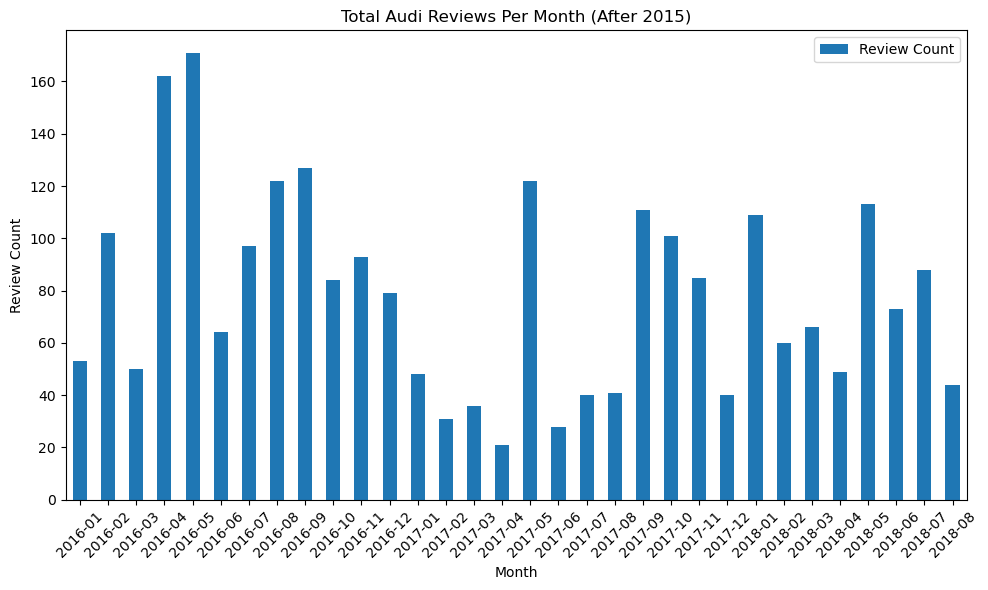

In [45]:
# Ensure the date column is in datetime format (replace 'review_date' with your actual column name)
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Filter the dataset for Audi brand and only reviews after 2015
audi_data = data[(data['brand_name'] == 'Audi') & (data['date'].dt.year > 2015)]

# Count the total reviews per month
audi_reviews_per_month = audi_data.groupby(audi_data['date'].dt.to_period('M')).size().reset_index(name='Review Count')

# Print the total reviews per month for Audi after 2015
print(audi_reviews_per_month)

# Plotting the total reviews per month for Audi after 2015 (optional)
import matplotlib.pyplot as plt

# Plot the results
audi_reviews_per_month.plot(x='date', y='Review Count', kind='bar', figsize=(10, 6))
plt.title("Total Audi Reviews Per Month (After 2015)")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()